In [3]:
from datetime import datetime
from siphon.simplewebservice.wyoming import WyomingUpperAir
from metpy.units import units 

In [4]:
date = datetime(2017, 9, 10, 0)
station = "EYW"
df = WyomingUpperAir.request_data(date, station)

In [5]:
df

,pressure,height,temperature,dewpoint,direction,speed,u_wind,v_wind,station,station_number,time,latitude,longitude,elevation,pw
0,993.0,13,25.6,25.5,35.0,29.0,-16.633717,-23.755409,EYW,72201,2017-09-10,24.55,-81.79,13.0,70.35
1,978.0,147,25.4,24.1,37.0,46.0,-27.683491,-36.737233,EYW,72201,2017-09-10,24.55,-81.79,13.0,70.35
2,960.5,305,24.2,23.1,40.0,66.0,-42.423982,-50.558933,EYW,72201,2017-09-10,24.55,-81.79,13.0,70.35
3,927.6,610,22.0,21.2,45.0,71.0,-50.204581,-50.204581,EYW,72201,2017-09-10,24.55,-81.79,13.0,70.35
4,925.0,635,21.8,21.1,45.0,71.0,-50.204581,-50.204581,EYW,72201,2017-09-10,24.55,-81.79,13.0,70.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,45.9,21336,-60.6,-87.1,75.0,24.0,-23.182220,-6.211657,EYW,72201,2017-09-10,24.55,-81.79,13.0,70.35
89,39.9,22205,-58.5,-86.5,66.0,29.0,-26.492818,-11.795363,EYW,72201,2017-09-10,24.55,-81.79,13.0,70.35
90,36.0,22860,-58.5,-86.5,60.0,32.0,-27.712813,-16.000000,EYW,72201,2017-09-10,24.55,-81.79,13.0,70.35
91,36.0,22852,-58.5,-86.5,60.0,32.0,-27.712813,-16.000000,EYW,72201,2017-09-10,24.55,-81.79,13.0,70.35


In [6]:
p = df['pressure'].values * units(df.units['pressure'])
h = df['height'].values * units(df.units['height'])
T = df['temperature'].values * units(df.units['temperature'])
Td = df['dewpoint'].values * units(df.units['dewpoint'])
u = df['u_wind'].values * units(df.units['u_wind'])
v = df['v_wind'].values * units(df.units['v_wind'])

In [7]:
import matplotlib.pyplot as plt 
import metpy.plots as plots 

# %matplotlib inline 

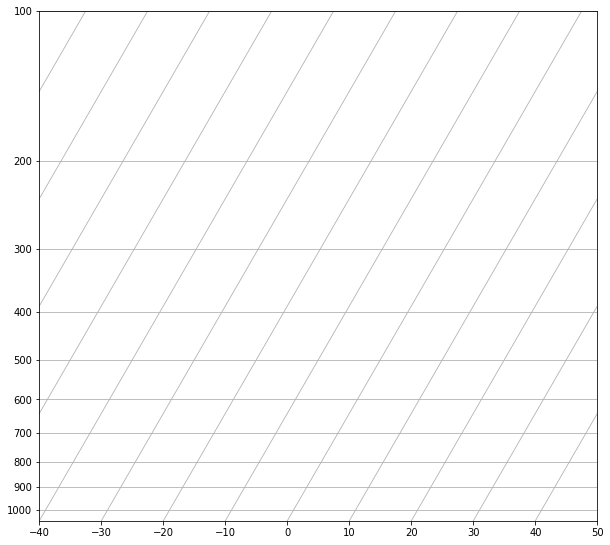

In [8]:
fig = plt.figure(figsize=(10,10))
skew = plots.SkewT(fig)

In [9]:
skew.plot(p, T, "red")

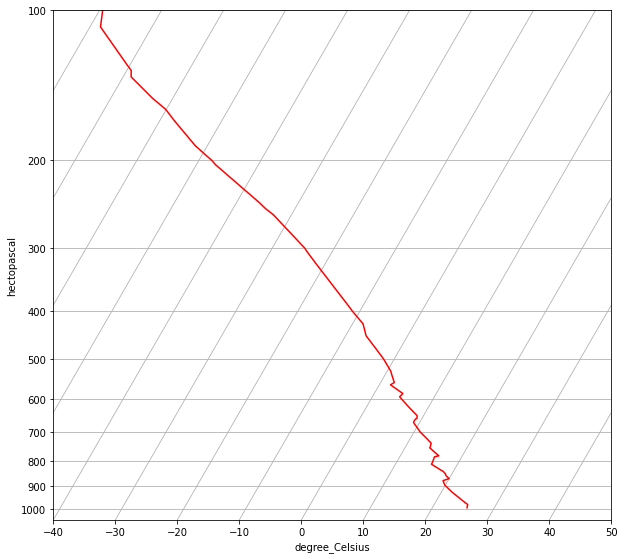

In [10]:
fig

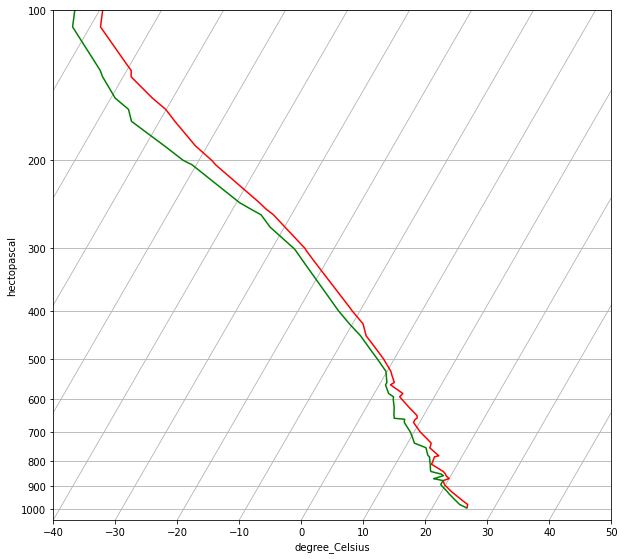

In [11]:
skew.plot(p, Td, "green")
fig

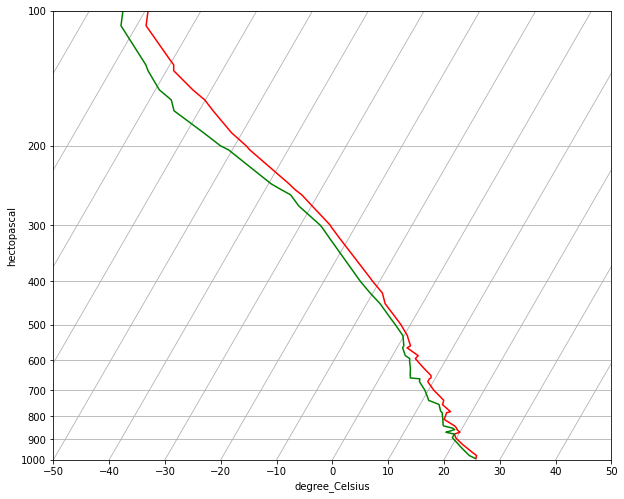

In [12]:
skew.ax.set_xlim(-50,50)
skew.ax.set_ylim(1000, 100)
fig

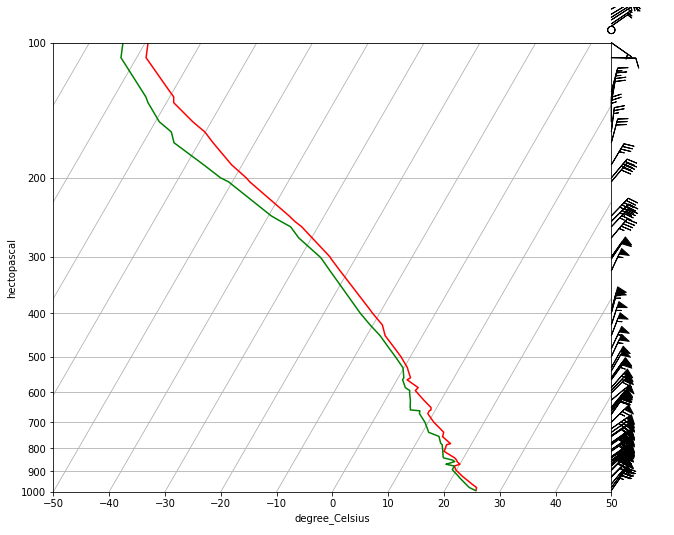

In [13]:
skew.plot_barbs(p, u, v)
fig

In [14]:
mask = p >= 100 * units.hPa
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

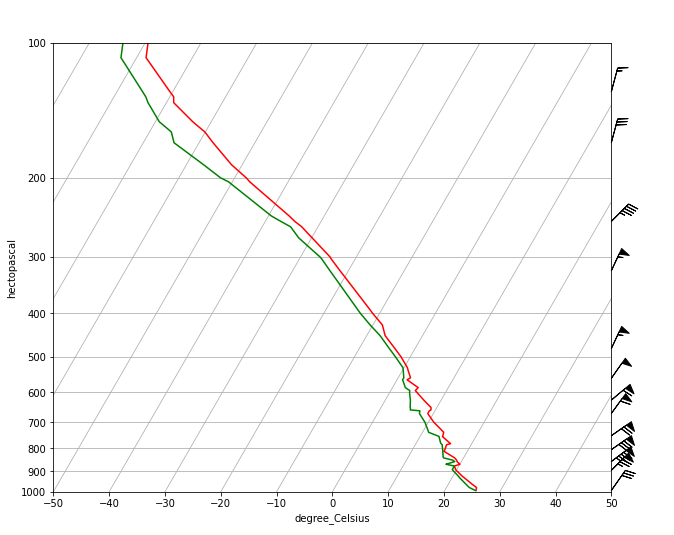

In [15]:
fig = plt.figure(figsize=(10,10))
skew = plots.SkewT(fig)
skew.plot(p, T, "red")
skew.plot(p, Td, "green")
skew.ax.set_xlim(-50, 50)
skew.ax.set_ylim(1000, 100)
skew.plot_barbs(p[mask][::5], u[mask][::5], v[mask][::5])

In [16]:
import numpy as np 
import metpy.calc as mpcalc 

In [17]:
interval = np.arange(100, 1000, 50) * units.hPa
interval 

Magnitude,[100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900 950]
Units,hectopascal


In [18]:
p

Magnitude,[993.0 978.0 960.5 927.6 925.0 895.8 892.0 876.0 868.0 864.8 856.0 850.0 840.0 834.7 812.0 805.5 785.0 781.0 777.2 753.0 749.9 737.0 723.3 700.0 672.5 669.0 660.0 657.0 650.0 648.3 624.8 602.1 595.0 586.0 563.0 558.7 557.0 538.0 529.0 500.0 479.8 449.0 425.0 400.0 394.7 321.9 303.0 300.0 272.0 257.0 250.0 243.0 204.0 200.0 187.0 167.0 158.0 150.0 136.0 132.0 128.6 108.0 100.0 93.7 91.9 90.8 89.0 87.8 86.4 84.2 81.4 79.9 79.4 75.9 74.6 72.1 71.2 70.0 68.5 65.1 61.0 58.8 58.7 53.2 50.7 50.0 48.2 48.1 45.9 39.9 36.0 36.0 34.3]
Units,hectopascal


In [19]:
idx = mpcalc.resample_nn_1d(p, interval)
idx

[62, 57, 53, 50, 47, 45, 43, 41, 39, 36, 31, 28, 23, 20, 15, 11, 5, 2]

In [20]:
p[idx]

Magnitude,[100.0 150.0 200.0 250.0 300.0 321.9 400.0 449.0 500.0 557.0 602.1 650.0 700.0 749.9 805.5 850.0 895.8 960.5]
Units,hectopascal


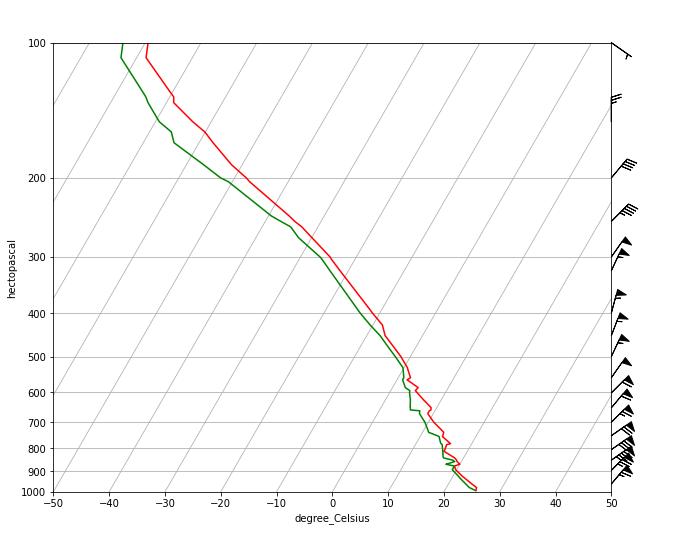

In [21]:
fig = plt.figure(figsize=(10,10))
skew = plots.SkewT(fig)
skew.plot(p, T, "red")
skew.plot(p, Td, "green")
skew.ax.set_xlim(-50, 50)
skew.ax.set_ylim(1000, 100)
skew.plot_barbs(p[idx], u[idx], v[idx])

In [22]:
interval = np.logspace(2, 3) * units.hPa
idx = mpcalc.resample_nn_1d(p, interval)
idx

[62,
 61,
 60,
 59,
 58,
 57,
 56,
 55,
 54,
 52,
 51,
 49,
 48,
 47,
 46,
 45,
 44,
 43,
 42,
 41,
 40,
 39,
 38,
 37,
 34,
 32,
 30,
 27,
 23,
 22,
 19,
 16,
 13,
 8,
 5,
 2,
 0]

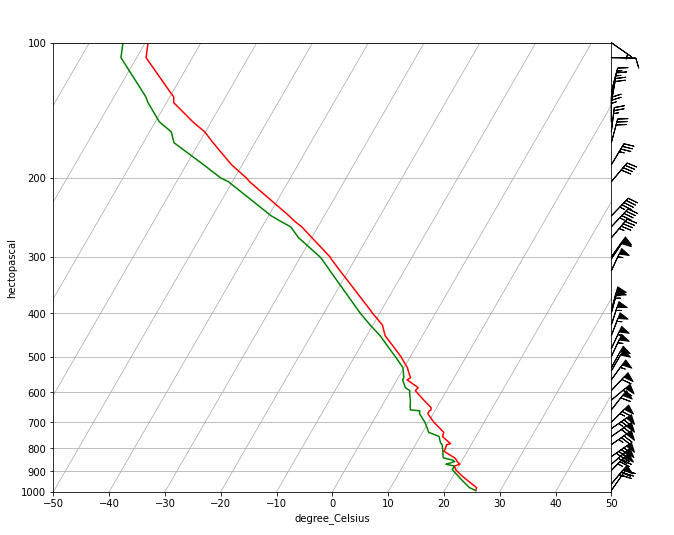

In [23]:
fig = plt.figure(figsize=(10,10))
skew = plots.SkewT(fig)
skew.plot(p, T, "red")
skew.plot(p, Td, "green")
skew.ax.set_xlim(-50, 50)
skew.ax.set_ylim(1000, 100)
skew.plot_barbs(p[idx], u[idx], v[idx])

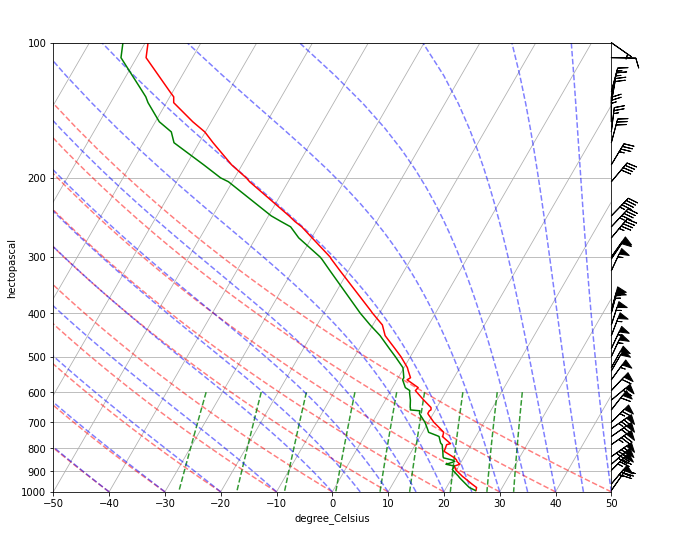

In [24]:
skew.plot_dry_adiabats()
skew.plot_mixing_lines()
skew.plot_moist_adiabats()
fig

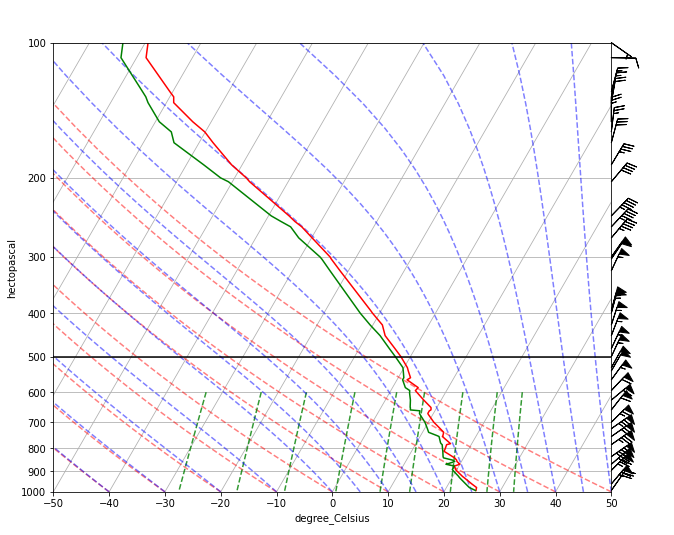

In [25]:
skew.ax.axhline(500 * units.hPa, color="black")
fig

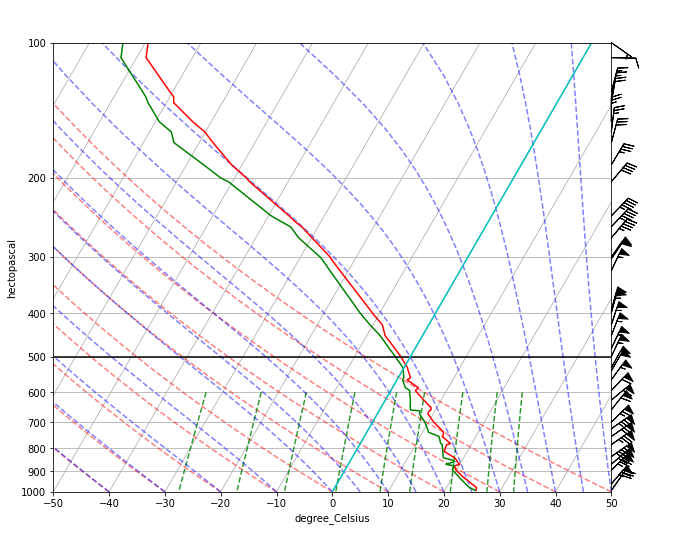

In [26]:
skew.ax.axvline(0 *units.degC , color='c')
fig

In [27]:
parcel_path = mpcalc.parcel_profile(p, T[0], Td[0])

In [28]:
parcel_path

Magnitude,[298.75 298.1727068826098 297.5773225878828 296.42342635991463 296.3302238630653 295.26205549164575 295.12005889524886 294.5142839835332 294.20648621319236 294.0824267751543 293.7384391305649 293.50148553537986 293.10210208510654 292.88812026145325 291.9528349224348 291.6792076538247 290.7983762342872 290.6232396206855 290.4558414343327 289.3656584874758 289.2228877622139 288.6208162875751 287.9668552810871 286.81810450559584 285.39815325267807 285.21209822260727 284.727844981375 284.5645240228068 284.1796454106075 284.08535995203204 282.74786738626807 281.39115775002244 280.9526945222966 280.38664749546194 278.88472553515567 278.5945752603318 278.47901265598676 277.15316201908524 276.5020268504932 274.2921525837918 272.64056937519 269.914941497286 267.58830884254184 264.9400260834809 264.3452846975918 254.6501844795191 251.5384130158112 251.01609994153648 245.71696315891128 242.52696020291367 240.94488216749258 239.29983574761232 228.86967320237144 227.66902266303785 223.58526260438555 216.73045247894063 213.40350487380434 210.3103743011034 204.5648199478233 202.8393543102327 201.3412646955943 191.57412295001035 187.4124343073397 183.96257950350807 182.94636111571603 182.31828404380664 181.27863892932402 180.57713459539482 179.74997103665683 178.43051996510883 176.7150200029533 175.77856925314745 175.46362456144468 173.2183094447901 172.36547289953634 170.6950665599882 170.08358675604663 169.25962615268816 168.21535530406493 165.78635948320266 162.7335764778054 161.03465689014507 160.95636177565243 156.495065134783 154.35765760719153 153.74572580365228 152.14358193406022 152.05332917780495 150.0329599783948 144.14642652907534 139.97191674155383 139.97191674155383 138.05066763116082]
Units,kelvin


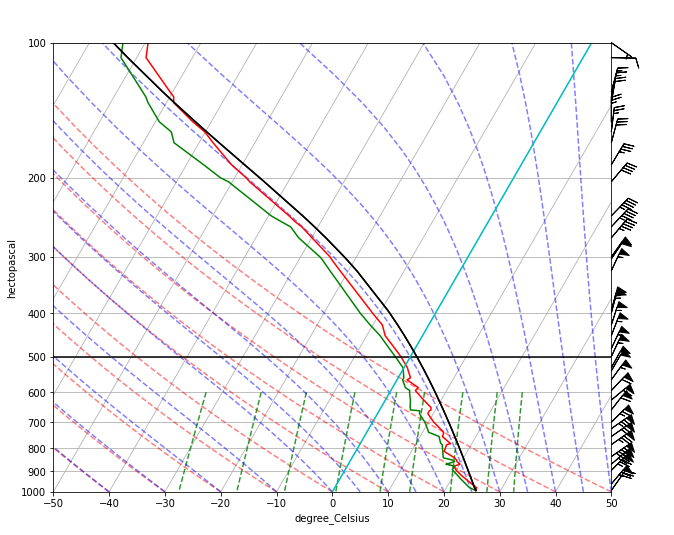

In [30]:
skew.plot(p, parcel_path, color = 'k')
fig

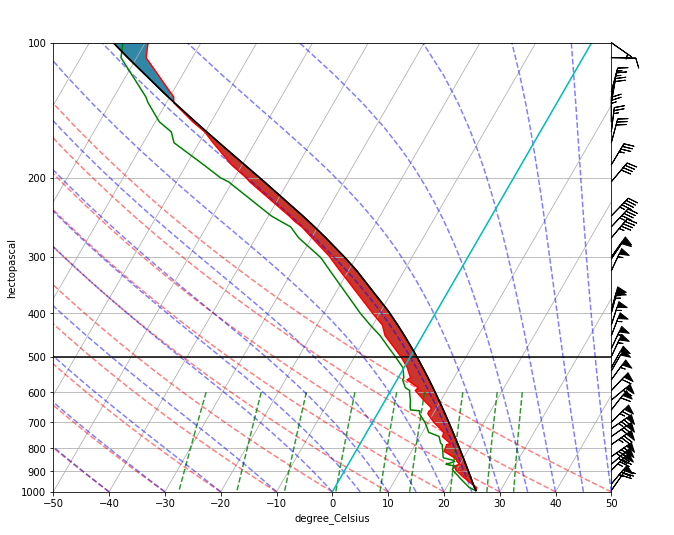

In [37]:
# skew.shade_area(p, T, parcel_path) #total 
skew.shade_cape(p, T, parcel_path)
skew.shade_cin(p, T, parcel_path)
fig